In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,make_scorer
import seaborn as sns
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords


from wordcloud import WordCloud
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline



import re
from nltk.stem import PorterStemmer





In [2]:
# Load the dataset
data = pd.read_csv('test_project.csv')  # Update the path to your dataset file


#data=data.sample(200000)

# Check for NaN values and fill them with a placeholder string (e.g., "missing")
data.fillna("missing", inplace=True)



In [3]:
custom_stopwords = [
    "i","im","like", "feel", "feeling", "my", "the", "to", "still"
                     "for","know","littl","think","time","thing","would","go",
                     "really","feel","am","so","get", "one", "to", "and", "at", "can",
                     "day","way", "make", "me", "want", "could" , "would", "tri", "u"                      
                     ]


all_stopwords=stopwords.words('english') + custom_stopwords

print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
#  function to clean text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove all non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace all runs of whitespaces with a single space
    # Optionally, remove stopwords and stem
    words = text.split()
    words = [word for word in words if word not in all_stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

data['Text'] = data['Text'].apply(clean_text)

In [5]:
# Creating a pipeline that includes TF-IDF vectorization and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('clf', LogisticRegression(max_iter=1000))
])

# Split your data
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Emotion'], test_size=0.2, random_state=42)




In [6]:
# Train your model
pipeline.fit(X_train, y_train)

# Predict and evaluate
predictions = pipeline.predict(X_test)



Accuracy: 0.9051724137931034
Precision: 0.905304810742657
Recall: 0.9051724137931034
F1 Score: 0.9040086091498751



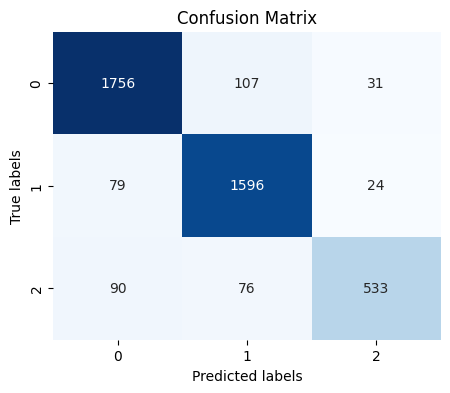

In [7]:
accuracy = accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted')  # Use 'macro' or 'micro' based on your needs
recall = recall_score(y_test, predictions, average='weighted')  # Use 'macro' or 'micro' based on your needs
f1 = f1_score(y_test, predictions, average='weighted')  # Use 'macro' or 'micro' based on your needs
cm = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print()
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
